# Mars Weather Data Analysis

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set up Splinter
from selenium.webdriver.chrome.service import Service

my_service = Service(executable_path='C://Users/annak/OneDrive/Desktop/chromedriver.exe')
browser = Browser('chrome', service = my_service)

In [3]:
# Visit the website
url='https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = html_soup.find('table', class_='table')

rows=table.find_all('tr', class_='data-row')

In [6]:
#Create list of headers for column names
table_header=table.find_all('th')

headers=[]
for header in table_header:
    title=header.text
    headers.append(title)

headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

Explanations for column headings:
* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
#create pandas dataframe with column headers
df=pd.DataFrame(columns=headers)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [8]:
# Find the row data, display in dataframe 
for row in rows:
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        length=len(df)
        df.loc[length]=row_data
        
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
#check data types
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
#change data types for analysis
df['id']=df['id'].astype(int)
df['terrestrial_date']=pd.to_datetime(df['terrestrial_date'])
df['sol']=df['sol'].astype(int)
df['ls']=df['ls'].astype(int)
df['month']=df['month'].astype(int)
df['min_temp']=df['min_temp'].astype(float)
df['pressure']=df['pressure'].astype(float)

In [11]:
#confirm changes were successful
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
#How many months are there on Mars?
months=df['month'].nunique()
print(f"There are {months} months on Mars.")

There are 12 months on Mars.


In [13]:
#How many Martian days worth of data are there in the data?
days=df['sol'].nunique()
print(f"There are {days} Martian days in the data gathered by Curiosity.")

There are 1867 Martian days in the data gathered by Curiosity.


In [14]:
# What is the average low temperature by month?
min_temp_df=df.groupby('month').mean().loc[:,['min_temp']]
min_temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0.5, 1.0, 'Average Minimum Temperature on Mars by Month')

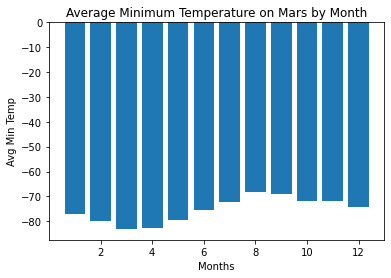

In [15]:
#plot the min temp by month
plt.bar(min_temp_df.index,min_temp_df['min_temp'])

plt.xlabel("Months")
plt.ylabel("Avg Min Temp")

plt.title("Average Minimum Temperature on Mars by Month")

In [16]:
# Identify the coldest and hottest months in Curiosity's location
min_temp=min_temp_df['min_temp'].min()
min_month=min_temp_df.loc[min_temp_df['min_temp']==min_temp]

min_month

,min_temp
month,
3,-83.307292


Month 3 is, on average, the coldest Martian month.

In [17]:
#Identify the hottest month in Curiosity's location
max_temp=min_temp_df['min_temp'].max()
max_month=min_temp_df.loc[min_temp_df['min_temp']==max_temp]

max_month

,min_temp
month,
8,-68.382979


Month 8 is, on average, the warmest Martian month.

In [18]:
#Average pressure by Martian month
pressure_df=df.groupby('month').mean().loc[:,['pressure']]
pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Average Atmospheric Pressure on Mars by Martian Month')

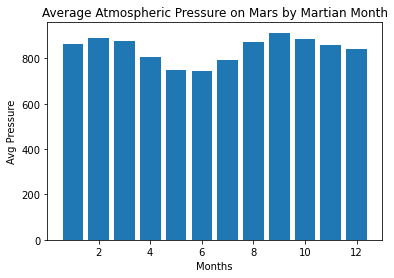

In [19]:
# Plot the average pressure by month
plt.bar(pressure_df.index, pressure_df['pressure'])

plt.xlabel("Months")
plt.ylabel("Avg Pressure")

plt.title("Average Atmospheric Pressure on Mars by Martian Month")

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

Text(0.5, 1.0, 'Minimum Temp by Martian Day')

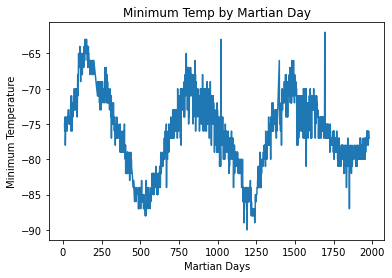

In [20]:
#How many terrestrial (Earth) days are in a Martian year?
#create a visual estimation by plotting minimum temperature by Martian days
plt.plot(df['sol'], df['min_temp'])

plt.xlabel("Martian Days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temp by Martian Day")

The above graph shows Mars circles the sun approximately three times in 2000 Martian days. We can make a visual estimate that a Martian year is around 666 earth days.

In [21]:
#Use solar longitude to calculate a Martian year
ls=df['ls'].loc[0]
year_ls=df.loc[df['ls']==ls]

year_ls

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [22]:
#Calculate actual 
from datetime import datetime, timedelta

date1=year_ls['terrestrial_date'].iloc[0]
date2=year_ls['terrestrial_date'].iloc[1]
martian_year=date2-date1

print(f"In one Martian year, {martian_year} days pass on Earth.")

In one Martian year, 686 days 00:00:00 days pass on Earth.


In [23]:
#Export DataFrame to CSV file
df.to_csv('mars_data.csv',index=False)

In [24]:
#close browser session
browser.quit()